### Business Scenario

RestoreMasters is a car restoration company based in New York, USA. Within short span of time, this company has become renowned for restoring vintage cars. Their team takes great pride in each of their projects, no matter how big or small. They offer paint jobs, frame build-ups, engine restoration, body work etc. They restore cars of various origins including USA, Europe and Asia.

The management wants to expand their business by increasing the capacity of the number of cars that can be restored. They want to generate greater revenue for the company through cost cutting and providing a data driven approach to their current process. They feel that the insights from existing data will help them in making data-driven decisions and also automate some of the key tasks in the process. We will be building a Random Forest model that can help in predicting the mileage of incoming cars.


In [2]:
    %%capture

    !pip install category_encoders==2.*

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#Update the DATA_PATH variable

import sys

if 'google.colab' in sys.modules:
  # If you're on Colab:
  DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_2/main/data/restoremasters/'
else:
  # If you're working locally:
  DATA_PATH = '..../data/'

In [5]:
# importing the dataset to Pandas DataFrame: cars_df
cars_df = pd.read_csv(DATA_PATH +'auto_mpg.csv')

In [6]:
# display the data in DataFrame: cars_df
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
# Check the number of rows and number of columns in Pandas DataFrame: cars_df
cars_df.shape

(398, 9)

In [8]:
# check the row index labels of Pandas DataFrame: cars_df
cars_df.index

RangeIndex(start=0, stop=398, step=1)

In [9]:
# Get the concise summary of DataFrame: cars_df
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
# Get the statistical summary of numeric columns of DataFrame: cars_df
cars_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<hr style="border:2px solid gray">


#**STEP: 1/4** - Handle missing values and high cardinality columns

In [11]:
# finding missing values
cars_df.isna().any()

,0
mpg,False
cylinders,False
displacement,False
horsepower,True
weight,False
acceleration,False
model_year,False
origin,False
name,False


In [12]:
# find the number of missing values
cars_df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [13]:
# find the rows where missing values are present
cars_df[cars_df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [15]:
# Replacing missing values with mean horsepower of cars with similar cylinders and model_year
cars_df['horsepower'] = cars_df.groupby(['cylinders', 'model_year'])['horsepower'].transform(lambda x: x.fillna(x.mean()))

In [16]:
# checking for missing values in columns of the DataFrame: cars_df
cars_df.isna().any()

,0
mpg,False
cylinders,False
displacement,False
horsepower,False
weight,False
acceleration,False
model_year,False
origin,False
name,False


In [17]:
# drop high cardinality columns
cars_df.drop(columns='name', inplace=True)

<hr style="border:2px solid gray">

#**STEP: 2/4** - Handle duplicate values and check for column types

In [19]:
# find the number of duplicate records the DataFrame: cars_df
cars_df.duplicated().sum()

np.int64(0)

In [20]:
# get the duplicate records in the DataFrame: cars_df
cars_df[cars_df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


In [21]:
# dropping the duplicate records in the DataFrame: cars_df
cars_df.drop_duplicates(inplace=True)
cars_df.duplicated().sum()

np.int64(0)

In [22]:
# get the data types of all columns of the DataFrame: cars_df
cars_df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,object


In [23]:
# setting data type of origin as 'category'
cars_df['origin'] = cars_df['origin'].astype('category')
cars_df['origin'].dtype

CategoricalDtype(categories=['europe', 'japan', 'usa'], ordered=False, categories_dtype=object)

<hr style="border:2px solid gray">

#**STEP: 3/4** - Handle outliers

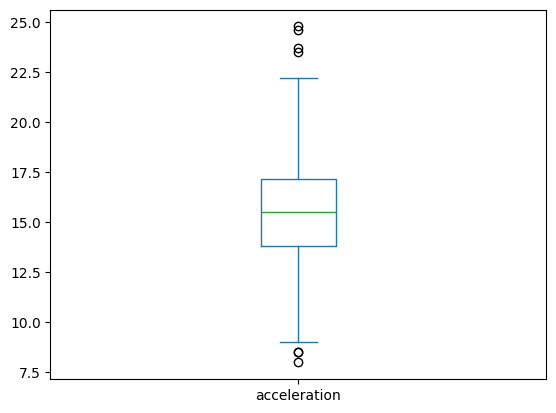

In [24]:
# A boxplot gives a good indication of distribution of data about the median.

cars_df['acceleration'].plot(kind='box')
plt.show()

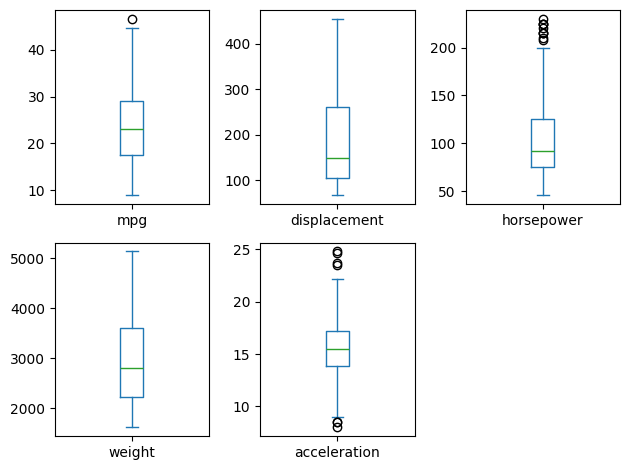

In [25]:
# box-plot for all numerical columns of the DataFrame: cars_df
# plt.subplot(nrows, ncols, plot_number)
# Plotting subplots On a grid of 2 rows x 3 columns

# box plot for mpg
plt.subplot(2,3,1)
cars_df['mpg'].plot(kind='box')

# box plot for displacement
plt.subplot(2,3,2)
cars_df['displacement'].plot(kind='box')

# box plot for horsepower
plt.subplot(2,3,3)
cars_df['horsepower'].plot(kind='box')

# box plot for weight
plt.subplot(2,3,4)
cars_df['weight'].plot(kind='box')

# box plot for acceleration
plt.subplot(2,3,5)
cars_df['acceleration'].plot(kind='box')

plt.tight_layout()
plt.show()

In [26]:
cars_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].describe()

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.099083,2970.424623,15.568090
std,7.815984,104.269838,38.336173,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,148.500000,92.000000,2803.500000,15.500000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


IQR method is a common statistical technique.
Purpose: Identify the range outside of which values in a column are considered outliers (unusually high or low values).
Method: Uses the IQR method, where outliers are typically defined as values below **Q1 - 1.5 * IQR** or above **Q3 + 1.5 * IQR**
Output: For each column, it returns and prints an upper limit (high) and a lower limit (low)

In [28]:
# finding the upper and lower limit of horsepower and acceleration columns

def find_outlier_limits(col_name):
    Q1,Q3 = cars_df[col_name].quantile([.25,.75]) # pandas series; computing the 25th percentile (Q1) and the 75th percentile (Q3); Q1 is the value below which 25% of the data lies; Q3 is the value below which 75% of the data lies
    IQR = Q3 - Q1 # Interquartile range; the difference between the 3rd and 1st quartiles; measures the spread of the middle 50% of the data, which is used to determine the range for identifying outliers
    low = Q1 - (1.5 * IQR) # values below this are considered potential outliers (unusually low); 1.5 is a standard mutliplier in the IQR method for defining outliers in a roughly normal distribution. It can be adjusted to 3 for stricter outlier detection.
    high = Q3 + (1.5 * IQR) # values above this are considered potential outliers (unusually high)
    return (high,low)

high_hp,low_hp = find_outlier_limits('horsepower')
print('Horsepower: ','upper limit: ',high_hp,' lower limit: ',low_hp)
high_acc,low_acc = find_outlier_limits('acceleration')
print('Acceleration: ','upper limit: ',high_acc,' lower limit:',low_acc)

Horsepower:  upper limit:  200.0  lower limit:  0.0
Acceleration:  upper limit:  22.2  lower limit: 8.8


In [29]:
# Replacing outlier values with respective upper and lower limits

cars_df.loc[cars_df['horsepower'] > high_hp, 'horsepower'] = high_hp
cars_df.loc[cars_df['acceleration'] > high_acc, 'acceleration'] = high_acc
cars_df.loc[cars_df['acceleration'] < low_acc, 'acceleration'] = low_acc

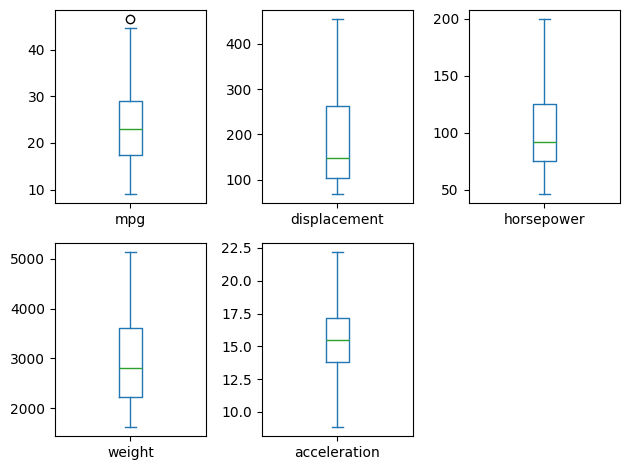

In [30]:
# box-plot for all numerical columns of the DataFrame: cars_df
# plt.subplot(nrows, ncols, plot_number)
# Plotting subplots On a grid of 2 rows x 3 columns

# box plot for mpg
plt.subplot(2,3,1)
cars_df['mpg'].plot(kind='box')

# box plot for displacement
plt.subplot(2,3,2)
cars_df['displacement'].plot(kind='box')

# box plot for horsepower
plt.subplot(2,3,3)
cars_df['horsepower'].plot(kind='box')

# box plot for weight
plt.subplot(2,3,4)
cars_df['weight'].plot(kind='box')

# box plot for acceleration
plt.subplot(2,3,5)
cars_df['acceleration'].plot(kind='box')

plt.tight_layout()
plt.show()

<hr style="border:2px solid gray">

#**STEP: 4/4** - Encode categorical columns and build a Random Forest Model


In [31]:
# Split the data into Feature Matrix and Target Vector

target = 'mpg'
y = cars_df[target]
X = cars_df.drop(columns=[target])

In [32]:
# Split data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
#Determine the baseline MAE

y_pred_baseline = [y_train.mean()] * len(y_train)
print('BASELINE MAE', mean_absolute_error(y_train,y_pred_baseline))

BASELINE MAE 6.684739527708555


In [34]:
# Random Forest Regressor

model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=42, n_jobs=-1)
);

model.fit(X_train, y_train);

In [35]:
# Mapping of class to label used for encoding

model.named_steps['ordinalencoder'].category_mapping

[{'col': 'origin',
  'mapping': usa       1
  japan     2
  europe    3
  NaN      -2
  dtype: int64,
  'data_type': CategoricalDtype(categories=['europe', 'japan', 'usa'], ordered=False, categories_dtype=object)}]

In [36]:
# check your metrics
print('Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))

Test MAE: 1.6458249999999992


analyzes a machine learning model to determine which features contribute most to its predictions

to identify and visualize which features (columns) are most influential in the random forest model's predictions

output is a horizontal bar plot showing the top 20 features ranked by their importance, measured by the reduction in Gini impurity

Gini impurity is like a way to measure how "messy" or mixed up the groupings are. If all data are part of the same group, the data is very "pure" and not messy at all. Gini impurity would be 0 (no mess)

if the data has a mix of groupings, it's messy. Gini impurity gives a number between 0 and 1 to show how mixed up it is. A higher number means more mess (lots of different groups)

In a RF model, the computer is trying to sort things (like predicting mpg) by making decisions, like "Does this car accelerate fast?" or "Does it have lots of horsepower?". Each decision splits the data into smaller groups, separating cars.

Gini impurity helps the computer figure out which question (like "Is horsepower high?") makes the groups less messy. If asking about horsepower splits the cars into groups where each group is mostly one type (all fast cars together), that's a good split, and Gini impurity goes down. The model picks questions that lower the messiness the most.

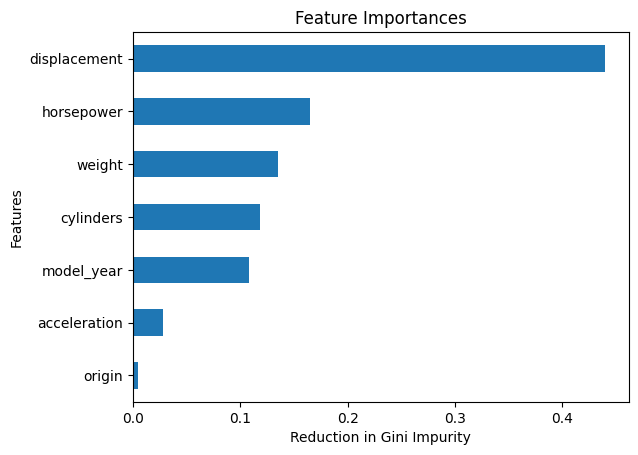

In [38]:
# Plot the top twenty feature importances

importances = model.named_steps['randomforestregressor'].feature_importances_ # importance scores for each feature; represent the avg reduction in Gini impurity (a measure of how much a feature helps split the data effectively in the decision trees) across all trees in the forest
features = model.named_steps['ordinalencoder'].get_feature_names_out() # names of features after encoding matching the order of the importances array
feat_imp = pd.Series(importances, index=features).sort_values(key=abs) # panda series where values are importances, index is the features array, and sorts absolute value in ascending order
feat_imp.tail(20).plot(kind='barh') # selects last 20 rows
plt.xlabel('Reduction in Gini Impurity')
plt.ylabel('Features')
plt.title('Feature Importances');